In [1]:
%pylab
%load_ext autoreload
%autoreload 2

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [42]:
from metric import tests
import cv2, tqdm
from utils import wand_transforms
import wand
from wand.image import Image
from sklearn import cluster
from metric.separate_iou import siou
from sklearn.metrics import adjusted_rand_score, cluster
import matplotlib.pyplot as plt
import tqdm
import numpy as np
import seaborn as sns

In [3]:
%matplotlib inline

In [5]:
# generate random images 100
!mkdir -p sparse0/compare

## Totally random generated images

In [54]:
lst = ['niou', 'ari', 'f0_ari', 'f1_ari', 'ff_ari', 'siou_normal', 'siou_prop', 'siou_inv']
results = {k:[] for k in lst}


for i in tqdm.trange(1):
    N = np.random.randint(25, 40)
    circs = tests.uniform_random_circles(N, 55, 450, 10, 50, 5)
    slices = np.zeros((N, 512, 512), np.uint8)
    image = np.zeros((512, 512), np.uint8)
    for j, (c, r) in enumerate(circs):
        slices[j] = cv2.circle(slices[j], c, r, 1, -1)
        image = cv2.circle(image, c, r, 1, -1)
    random_target = np.random.rand(*image.shape)
    random_target = (random_target < .5).astype(np.uint8)
    
    for normalize in ['normal', 'prop', 'inv']:
        results['siou_'+normalize].append(siou(random_target, slices, normalize=normalize))
    
    orig = image
    img = random_target
    _, x = cv2.connectedComponents(orig, connectivity=8)
    _, y = cv2.connectedComponents(img, connectivity=8)
    results['ari'].append(adjusted_rand_score(x.reshape(-1), y.reshape(-1)))
    
    idx = orig != 0
    results['f0_ari'].append(adjusted_rand_score(x[idx], y[idx]))
    
    idx = img != 0
    results['f1_ari'].append(adjusted_rand_score(x[idx], y[idx]))
    
    idx = (orig != 0) | (img != 0)
    results['ff_ari'].append(adjusted_rand_score(x[idx], y[idx]))
    
#     orig = orig.astype(bool)
#     img = img.astype(bool)
#     results['niou'].append((orig&img).sum()/(orig|img).sum())
    
for k in lst:
    ar = np.array(results[k])
    mean, std = ar.mean(), ar.std()
    print(f'{k:15s} {mean:.2f} {std:.2f}')
for k in lst:
    ar = np.array(results[k])
    mean, std = ar.mean(), ar.std()
    print(f'{mean:.2f} $\pm$ {std:.2f}', end=' & ')

100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

niou            nan nan
ari             -0.00 0.00
f0_ari          -0.00 0.00
f1_ari          -0.01 0.00
ff_ari          0.42 0.00
siou_normal     0.00 0.00
siou_prop       0.00 0.00
siou_inv        0.00 0.00
nan $\pm$ nan & -0.00 $\pm$ 0.00 & -0.00 $\pm$ 0.00 & -0.01 $\pm$ 0.00 & 0.42 $\pm$ 0.00 & 0.00 $\pm$ 0.00 & 0.00 $\pm$ 0.00 & 0.00 $\pm$ 0.00 & 


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice.
/usr/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: Mean of empty slice.


In [72]:
x = np.random.randint(0, 30, 1000)
y = np.random.randint(0, 1000, 1000)
y[y < 500] = 0
y[y > 500] = 1

In [73]:
adjusted_rand_score(x, y)

-0.0003816590206668117

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


In [53]:
sum_comb - prod_comb

1459973871.5936494

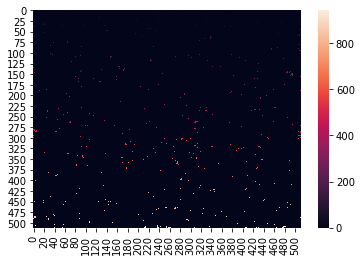

# Random with same fraction of white pixels

In [5]:
lst = ['niou', 'ari', 'f0_ari', 'f1_ari', 'ff_ari', 'siou_normal', 'siou_prop', 'siou_inv']
results = {k:[] for k in lst}


for i in tqdm.trange(100):
    N = np.random.randint(25, 40)
    circs = tests.uniform_random_circles(N, 55, 450, 10, 50, 5)
    slices = np.zeros((N, 512, 512), np.uint8)
    image = np.zeros((512, 512), np.uint8)
    for j, (c, r) in enumerate(circs):
        slices[j] = cv2.circle(slices[j], c, r, 1, -1)
        image = cv2.circle(image, c, r, 1, -1)
    p = image.sum()/image.size
    random_target = np.random.rand(*image.shape)
    random_target = (random_target < p).astype(np.uint8)
    
    for normalize in ['normal', 'prop', 'inv']:
        results['siou_'+normalize].append(siou(random_target, slices, normalize=normalize))
    
    orig = image
    img = random_target
    _, x = cv2.connectedComponents(orig, connectivity=8)
    _, y = cv2.connectedComponents(img, connectivity=8)
    results['ari'].append(adjusted_rand_score(x.reshape(-1), y.reshape(-1)))
    
    idx = orig != 0
    results['f0_ari'].append(adjusted_rand_score(x[idx], y[idx]))
    
    idx = img != 0
    results['f1_ari'].append(adjusted_rand_score(x[idx], y[idx]))
    
    idx = (orig != 0) | (y != 0)
    results['ff_ari'].append(adjusted_rand_score(x[idx], y[idx]))
    
    orig = orig.astype(bool)
    img = img.astype(bool)
    results['niou'].append((orig&img).sum()/(orig|img).sum())
    
for k in lst:
    ar = np.array(results[k])
    mean, std = ar.mean(), ar.std()
    print(f'{k:15s} {mean:.2f} {std:.2f}')
    
for k in lst:
    ar = np.array(results[k])
    mean, std = ar.mean(), ar.std()
    print(f'{mean:.2f} $\pm$ {std:.2f}', end=' & ')

100%|██████████| 100/100 [01:15<00:00,  1.30it/s]

niou            0.14 0.02
ari             -0.00 0.00
f0_ari          0.00 0.00
f1_ari          0.00 0.00
ff_ari          -0.17 0.01
siou_normal     0.01 0.01
siou_prop       0.00 0.00
siou_inv        0.02 0.02
0.14 $\pm$ 0.02 & -0.00 $\pm$ 0.00 & 0.00 $\pm$ 0.00 & 0.00 $\pm$ 0.00 & -0.17 $\pm$ 0.01 & 0.01 $\pm$ 0.01 & 0.00 $\pm$ 0.00 & 0.02 $\pm$ 0.02 & 

In [12]:
y.max()

17004

## $n = 1 to 50$

In [6]:
frac = []
ious_5 = []
ious_p = []
for i in range(100):
    n = np.random.randint(1, 70)
    circs = tests.uniform_random_circles(n, 55, 450, 10, 40, 5)
    image = np.zeros((512, 512), np.uint8)
    for j, (c, r) in enumerate(circs):
        image = cv2.circle(image, c, r, 1, -1)
    orig = image.astype(bool)
    p = orig.sum()/orig.size
   
    frac.append(p)
    
    random_target = np.random.rand(*image.shape)
    random_target = random_target > .5
    ious_5.append((orig&random_target).sum()/(orig|random_target).sum())
    
    random_target = np.random.rand(*image.shape)
    random_target = random_target < p
    ious_p.append((orig&random_target).sum()/(orig|random_target).sum())

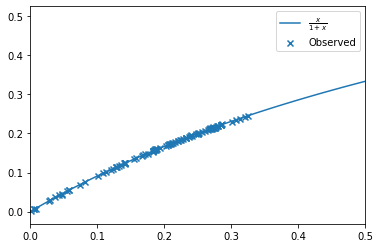

In [7]:
x = np.linspace(0.001, 1, 100)
y = x / (1+x)

plt.plot(x, y, label=r'$\frac{x}{1 + x}$')
plt.scatter(frac, ious_5, marker='x', label="Observed")
plt.xlim(0, .5)
plt.legend()
# plt.plot(x, x/2)
# plt.scatter(frac, intersects)

In [ ]:
x = np.linspace(0.001, 1, 100)
y = x / (2-x)

plt.plot(x, y, label=r'$\frac{x}{2 - x}$')
plt.scatter(frac, ious_p, marker='x', label="Observed")
plt.xlim(0, .5)
plt.legend()
# plt.plot(x, x/2)
# plt.scatter(frac, intersects)

# circles as random 

In [3]:
lst = ['niou', 'ari', 'f0_ari', 'f1_ari', 'ff_ari', 'siou_normal', 'siou_prop', 'siou_inv']
results = {k:[] for k in lst}


for i in tqdm.trange(100):
    circs = tests.uniform_random_circles(25, 55, 450, 10, 50, 5)
    slices = np.zeros((25, 512, 512), np.uint8)
    orig = np.zeros((512, 512), np.uint8)
    for j, (c, r) in enumerate(circs):
        slices[j] = cv2.circle(slices[j], c, r, 1, -1)
        orig = cv2.circle(orig, c, r, 1, -1)
        
    img = np.zeros((512,512), np.uint8)
#     n = np.random.randint(1, 25)
    for c, r in tests.uniform_random_circles(25, 55, 450, 10, 50, 5):
        img = cv2.circle(img, c, r, 1, -1)
        
    
    for normalize in ['normal', 'prop', 'inv']:
        results['siou_'+normalize].append(siou(random_target, slices, normalize=normalize))
    
    
    _, x = cv2.connectedComponents(orig, connectivity=8)
    _, y = cv2.connectedComponents(img, connectivity=8)
    results['ari'].append(adjusted_rand_score(x.reshape(-1), y.reshape(-1)))
    
    idx = orig != 0
    results['f0_ari'].append(adjusted_rand_score(x[idx], y[idx]))
    
    idx = img != 0
    results['f1_ari'].append(adjusted_rand_score(x[idx], y[idx]))
    
    idx = (orig != 0) | (y != 0)
    results['ff_ari'].append(adjusted_rand_score(x[idx], y[idx]))
    
    orig = orig.astype(bool)
    img = img.astype(bool)
    results['niou'].append((orig&img).sum()/(orig|img).sum())
    
for k in lst:
    ar = np.array(results[k])
    mean, std = ar.mean(), ar.std()
    print(f'{k:15s} {mean:.2f} {std:.2f}')
    
for k in lst:
    ar = np.array(results[k])
    mean, std = ar.mean(), ar.std()
    print(f'{mean:.2f}', end=' & ')

  0%|          | 0/100 [00:00<?, ?it/s]


NameError: name 'np' is not defined

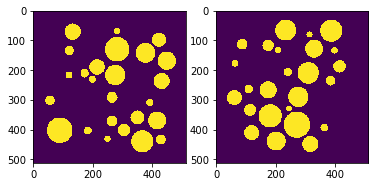

In [22]:
subplot(1, 2, 1)
imshow(orig)
subplot(1, 2, 2)
imshow(img)

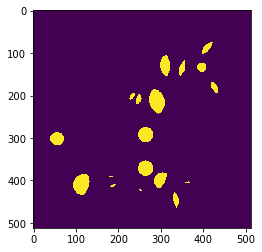

In [25]:
imshow(img*orig)

In [ ]:
orig[~idx] = 0
img[~idx] = 0
subplot(1, 2, 1)
imshow(orig)
subplot(1, 2, 2)
imshow(img)

## Size of largest connected component in a square

In [ ]:
for sz in tqdm.tqdm([16, 32, 128, 256, 512]):
    probs = np.linspace(0.1, 1, 100)
    avgs = []
    h,w = sz, sz
    size = h*w
    for p in probs:
        avg = 0
        for i in range(100):
            img = (np.random.rand(h, w) < p).astype(np.uint8)
            a,b,c,d = cv2.connectedComponentsWithStats(img)
            avg += c[1:, cv2.CC_STAT_AREA].max()
        avg /= 100
        avg /= (h*w)
        avgs.append(avg)
    plt.plot(probs, avgs, label=f'{sz}x{sz}')
plt.legend()